Author: Nik Alleyne <br>
Author Blog: https://www.securitynik.com <br>
Author GitHub:github.com/securitynik <br>
Author Books: [  <br>
                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",  <br>
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" <br>
            ] <br>

## 07 - Beginning Principal Component Analysis (PCA)

This post is part of my beginning machine learning series.  <br>
The series includes the following: <br>

01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - KMeans and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning, - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning, - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning, - Classification, Tensorflow <br>
17 - Beginning Deep Learning, - Classification, Pytorch <br>
18 - Beginning Deep Learning, - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning, - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning, - Convolution Networks, PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
23 - Beginning Model TFServing <br>

But conn.log is not the only file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

24 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
25 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
26 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 26 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>


In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
# In the notebooks on Pandas, Matplotlib and Scaling
#   04 - Beginning Pandas
#   05 - Beginning Matplotlib 
#   06 - Beginning Data Scaling
# we loaded our dataset such as ...
df_conn = pd.read_csv(r'df_conn_cleaned.csv', index_col=0)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,0.000051,0,0,1,52,1,40
4430184,192.168.0.4,37236,192.168.0.4,9200,0.000023,0,0,0,0,1,40
4430185,192.168.0.4,37244,192.168.0.4,9200,0.000005,0,0,0,0,1,40
4430186,192.168.0.4,37246,192.168.0.4,9200,0.000005,0,0,0,0,1,40


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [4]:
# Let's drop the IPs and source port columns
# For the problem we are looking to solve, these fields are not that important
df_working_copy = df_conn.drop(columns=['id.orig_h', 'id.orig_p', 'id.resp_h'])
df_working_copy.head(10)

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,58552,0.000000,0,0,0,0,0,0
1,48798,0.000000,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0
3,58568,0.000000,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296
6,8888,0.383646,227,692369,202,10739,117,240893
7,8888,0.054294,208,977,6,528,6,1297
8,8888,0.424980,227,791633,176,9387,174,367737
9,8888,0.272567,227,406607,171,9127,71,169939


In [7]:
# In the Pandas notebook, we leveraged the correlation matrix
#   04 - Beginning Pandas
# This helps us to understand the direction and strength of the relationship between two variables
# We can see below, "orig_ip_bytes"and "orig_pkts" has a strong positive correlation "0.913031"
df_working_copy.corr(method='pearson')

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
id.resp_p,1.000000,-0.023331,-0.001296,-0.004295,-0.004254,-0.001200,-0.004245,-0.004217
duration,-0.023331,1.000000,0.013364,0.005255,0.080948,0.057768,0.061032,0.030080
orig_bytes,-0.001296,0.013364,1.000000,0.139161,0.201162,0.223028,0.138787,0.081752
resp_bytes,-0.004295,0.005255,0.139161,1.000000,0.108039,0.058442,0.153469,0.165182
orig_pkts,-0.004254,0.080948,0.201162,0.108039,1.000000,0.913031,0.840132,0.662968
orig_ip_bytes,-0.001200,0.057768,0.223028,0.058442,0.913031,1.000000,0.636315,0.385603
resp_pkts,-0.004245,0.061032,0.138787,0.153469,0.840132,0.636315,1.000000,0.946548
resp_ip_bytes,-0.004217,0.030080,0.081752,0.165182,0.662968,0.385603,0.946548,1.000000


In [8]:
# Maybe a simplier view
df_working_copy[['orig_ip_bytes', 'orig_pkts' ]].corr(method='pearson')

,orig_ip_bytes,orig_pkts
orig_ip_bytes,1.000000,0.913031
orig_pkts,0.913031,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

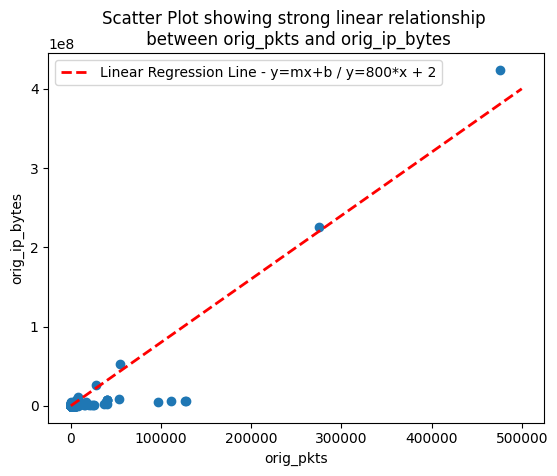

In [9]:
# Let's setup a line to draw in 2 dimensions.
# First the x
x = np.linspace(0, 500000)

# To compute y we take the linear equation y=mx+b
# In this case our m is 800 and b is 2 
# I manually selected these values, there were not "learened"
# We learn more about linear regression in notebook
#   11. Beginning Linear Regression - Machine Learning
#   14. Beginning Basic Deep Learning, - Linear Regression, Tensorflow
#   15. Beginning Basic Deep Learning, - Linear Regression, PyTorch
# Compute y
y = 800*x + 2

# Confirming the positive correlation by plotting the two features
plt.title(f'Scatter Plot showing strong linear relationship \n between orig_pkts and orig_ip_bytes')
plt.scatter(df_working_copy['orig_pkts'], df_working_copy['orig_ip_bytes'])
plt.xlabel('orig_pkts')
plt.ylabel('orig_ip_bytes')

plt.plot(x, y, c='r', lw=2, ls='--', label='Linear Regression Line - y=mx+b / y=800*x + 2')
plt.legend()
plt.show

Similarly to the correlation matrix, there is the covariance matrix. <br>
This covariance matrix can then be used for dimensionality reduction. <br>
Dimensionality reduction is about reducing the number of features. <br>
More features does not necessarily mean a better performing model. <br>
At the same time, we saw above in the correlation matrix and  <br>
at least two features have a positive linear correlation. <br>
What do we do with these correlated features? <br>
Do we drop both? Do we keep both? Do we drop one? If one, which one? <br>

In [10]:
# Getting the covariance matrix
df_working_copy.cov()

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
id.resp_p,3.786541e+07,-6012.951063,-7.890107e+06,-8.621203e+07,-7.665920e+03,-1.700459e+06,-1.139986e+04,-1.315667e+07
duration,-6.012951e+03,1754.159887,5.539323e+05,7.179083e+05,9.928298e+02,5.572362e+05,1.115448e+03,6.387629e+05
orig_bytes,-7.890107e+06,553932.311554,9.794549e+11,4.492245e+11,5.830054e+07,5.083589e+10,5.993794e+07,4.102255e+10
resp_bytes,-8.621203e+07,717908.303724,4.492245e+11,1.063914e+13,1.031972e+08,4.390321e+10,2.184411e+08,2.731797e+11
orig_pkts,-7.665920e+03,992.829755,5.830054e+07,1.031972e+08,8.575658e+04,6.157965e+07,1.073597e+05,9.843724e+07
orig_ip_bytes,-1.700459e+06,557236.193452,5.083589e+10,4.390321e+10,6.157965e+07,5.304399e+10,6.395152e+07,4.502897e+10
resp_pkts,-1.139986e+04,1115.447544,5.993794e+07,2.184411e+08,1.073597e+05,6.395152e+07,1.904236e+05,2.094287e+08
resp_ip_bytes,-1.315667e+07,638762.920152,4.102255e+10,2.731797e+11,9.843724e+07,4.502897e+10,2.094287e+08,2.570789e+11


In [11]:
# This covariance matrix is important for Principal Component Analysis.
# How do we calculate this?
# Let's reuse the two features, we created in the scaling notebook
#   06 - Beginning Data Scaling
common_ports = np.array([0, 80, 443, 445, 995, 65535], dtype=int, ndmin=2).T
common_ports

array([[    0],
       [   80],
       [  443],
       [  445],
       [  995],
       [65535]])

In [12]:
# Setup the duration column
duration = np.array([[1], [1], [2], [1], [2], [1]], dtype=np.float32)
duration

array([[1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.]], dtype=float32)

In [13]:
# Stacking the to columns / features to create a dataset
np.set_printoptions(suppress=True)
my_2_features = np.hstack((common_ports, duration))
my_2_features 

array([[    0.,     1.],
       [   80.,     1.],
       [  443.,     2.],
       [  445.,     1.],
       [  995.,     2.],
       [65535.,     1.]])

In [14]:
# Let's now manually calculate the covariance of these two features
# References:
#   https://www.indeed.com/career-advice/career-development/how-to-calculate-covariance
#  First step in finding covariance, is finding the mean of each feature
# Getting the mean
x1_x2_mean = np.mean(my_2_features, axis=0)
x1_x2_mean

array([11249.66666667,     1.33333333])

In [15]:
# Second step, find the difference between each value of column 1 and its mean
x_1 = np.array([ ( i - x1_x2_mean[0] ) for i in my_2_features[:, 0]])
x_1

array([-11249.66666667, -11169.66666667, -10806.66666667, -10804.66666667,
       -10254.66666667,  54285.33333333])

In [16]:
# Second step, find the difference between each value of column 2 and its mean
x_2 = np.array([ ( i - x1_x2_mean[1] ) for i in my_2_features[:, 1]])
x_2

array([-0.33333333, -0.33333333,  0.66666667, -0.33333333,  0.66666667,
       -0.33333333])

In [17]:
# Now multiply the two matrices, then find the sum 
# Then divide the sum by the number of elements
# The answer would be the covariance
# while I could do
# sum(x_1 * x_2)/len(my_2_features)
# I'm choosing the different route
np.dot(x_1, x_2) / len(my_2_features) 


-3510.2222222222226

In [20]:
np.set_printoptions(suppress=True)
# Confirming Numpy's calculation of the covariance of these two features
# As can be seen below, we got the same 130.56
# References
#   https://numpy.org/doc/stable/reference/generated/numpy.cov.html 
np.cov(my_2_features, rowvar=False, ddof=0) 

array([[ 5.89482821e+08, -3.51022222e+03],
       [-3.51022222e+03,  2.22222222e-01]])

With that understanding in place, <br>
Let's start our process of conducting Principal Component Analysis (PCA) <br>
With PCA, we want to find the directions of maximum variance in our dataset. <br>
We will then use these directions to project our data into a lower dimensional subspace,  <br>
while maintaining most of the "meaning" of the data <br>
These directions are call the Principal Components. <br>

Along with the eigenvectors, we will also obtain the associated eigenvalues <br>
The eigenvalues tell us the magnitude, explaining the variance of the data along the new feature axes <br>
For example, at present we have 8 features as seen from the shape of the dataframe below <br>
Can we get this down to 2 or 3 dimensions and still retain the "meaning" of the data?
Let's see ... <br>

https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

In [21]:
# Confirming the shape of our dataset, to get the number of columns.
# Below shows 8
df_working_copy.shape

(4430183, 8)

In [22]:
# First step in using PCA, is for us to standardize our data
# We learned about standardization in this notebook  
#   06 - Beginning Data Scaling
# We will take advantage of sklearn's StandardScaler
from sklearn.preprocessing import StandardScaler

In [23]:
# Scaled our dataset using StandardScaler
df_conn_scaled = StandardScaler(with_mean=True, with_std=True).fit_transform(df_working_copy)
df_conn_scaled

array([[ 7.92392101, -0.01962605, -0.00096369, ..., -0.00140711,
        -0.00553931, -0.00707216],
       [ 6.33880343, -0.01962605, -0.00096369, ..., -0.00140711,
        -0.00553931, -0.00707216],
       [ 6.33977849, -0.01962605, -0.00096369, ..., -0.00140711,
        -0.00553931, -0.00707216],
       ...,
       [-0.09624742, -0.01962593, -0.00096369, ..., -0.00140711,
        -0.0032477 , -0.00699327],
       [-0.09624742, -0.01962593, -0.00096369, ..., -0.00140711,
        -0.0032477 , -0.00699327],
       [-0.09624742, -0.01962593, -0.00096369, ..., -0.00140711,
        -0.0032477 , -0.00699327]])

While we will use the covariance matrix to perform eigen decomposition,  <br>
to get the eigenvector and egienvalues, you can also use the correlation matrix <br> 
or Singular Value Decomposition (SVD). <br>
The correlation matrix is considered to be a normalize version of the covariance matrix <br>

Getting the covariance matrix of the scaled data <br>
Notice my use of rowvar=False. <br>
If rowvar was True as in rowvar=True, this would instead produce of covariance matrix of the rows. <br>
We want the covariance of the features, i.e. the columns <br>

Alternatively, we could have transposed the scaled data if we did not wish to use the rowvar=False <br>
df_conn_cov = np.cov(df_conn_scaled.T)

In [24]:
# Setting the row_var=True, which is the default, so we can see what the issue is
# Sampling the first 10 records in the numpy array
df_conn_cov = np.cov(df_conn_scaled[:10, :], rowvar=True)
df_conn_cov, df_conn_cov.shape

(array([[ 7.8613533 ,  6.29003481,  6.29100138,  7.86393081,  2.90108393,
         -0.14504351, -0.3800841 , -0.14504732, -0.42506085, -0.31660605],
        [ 6.29003481,  5.03279105,  5.03356442,  6.29209714,  2.32122276,
         -0.11604516, -0.30408611, -0.11604822, -0.3400742 , -0.25330242],
        [ 6.29100138,  5.03356442,  5.03433791,  6.29306402,  2.32157945,
         -0.116063  , -0.30413285, -0.11606606, -0.34012648, -0.25334136],
        [ 7.86393081,  6.29209714,  6.29306402,  7.86650918,  2.9020351 ,
         -0.14509108, -0.38020877, -0.14509489, -0.42520025, -0.31670989],
        [ 2.90108393,  2.32122276,  2.32157945,  2.9020351 ,  1.07060359,
         -0.0535028 , -0.14017696, -0.05350423, -0.15677872, -0.11677192],
        [-0.14504351, -0.11604516, -0.116063  , -0.14509108, -0.0535028 ,
          0.00276957,  0.00847943,  0.00276958,  0.00912564,  0.00707492],
        [-0.3800841 , -0.30408611, -0.30413285, -0.38020877, -0.14017696,
          0.00847943,  0.0768038

In [25]:
# Above, we see 10 samples with 10 features. 
# This is not what we want

In [26]:
# Getting the covariance matrix the right way - well at least one of the right ways
df_conn_cov = np.cov(df_conn_scaled, rowvar=False)
df_conn_cov, df_conn_cov.shape

(array([[ 1.00000023, -0.02333092, -0.0012956 , -0.0042953 , -0.00425412,
         -0.00119985, -0.00424539, -0.00421688],
        [-0.02333092,  1.00000023,  0.0133638 ,  0.0052551 ,  0.08094808,
          0.05776792,  0.06103154,  0.0300796 ],
        [-0.0012956 ,  0.0133638 ,  1.00000023,  0.13916117,  0.20116235,
          0.22302844,  0.13878717,  0.0817518 ],
        [-0.0042953 ,  0.0052551 ,  0.13916117,  1.00000023,  0.10803915,
          0.05844199,  0.15346909,  0.16518175],
        [-0.00425412,  0.08094808,  0.20116235,  0.10803915,  1.00000023,
          0.91303091,  0.84013177,  0.66296803],
        [-0.00119985,  0.05776792,  0.22302844,  0.05844199,  0.91303091,
          1.00000023,  0.63631549,  0.38560336],
        [-0.00424539,  0.06103154,  0.13878717,  0.15346909,  0.84013177,
          0.63631549,  1.00000023,  0.94654827],
        [-0.00421688,  0.0300796 ,  0.0817518 ,  0.16518175,  0.66296803,
          0.38560336,  0.94654827,  1.00000023]]),
 (8, 8))

In [27]:
# We can see from the shape above (and below), it is 8x8
# If we have 4 features, we will have a 4x4 covariance matrix
# In our case, we have 8 features and 4430183 samples
# hence the 8x8 matrix for our features
df_conn_scaled.shape, df_conn_cov.shape

((4430183, 8), (8, 8))

In [28]:
# Next we perform the eigen decomposition
# The objective here is to get eigen pairs
# The eigenpairs is the eigenvector and its associated eigenvalue
eig_value, eig_vectors = np.linalg.eig(df_conn_cov)

In [29]:
# Here is the eigenvalues, which represent the magnitude of the direction
# Note 8 values for our 8 features
eig_value

array([3.29066414, 0.65476779, 0.94313613, 0.98037087, 1.02158614,
       1.06675137, 0.0331755 , 0.00954988])

In [30]:
# Confirming the length of the vector containing the eigenvalues
len(eig_value)

8

In [31]:
# Similarly, here is the eigenvectors, which represents the Principal Components
eig_vectors, eig_vectors.shape

(array([[-0.00384108, -0.00505299,  0.19814749,  0.6705112 , -0.7149068 ,
          0.00439339,  0.00099558, -0.0000279 ],
        [ 0.05103953, -0.0553955 ,  0.36717972,  0.61910615,  0.6831142 ,
          0.095694  , -0.0143103 ,  0.01434557],
        [ 0.14525053, -0.42996113, -0.5056809 ,  0.25157004,  0.09386086,
         -0.68278284,  0.00572403, -0.00012409],
        [ 0.11339098,  0.34960956,  0.58192763, -0.18912935, -0.02348038,
         -0.69995803, -0.00319353, -0.00178683],
        [ 0.52453684,  0.26242546, -0.14048178,  0.0575289 ,  0.01193903,
          0.07984289,  0.78967563, -0.05333156],
        [ 0.45032698,  0.55267006, -0.32528483,  0.14113182,  0.0353772 ,
          0.04099439, -0.53718089,  0.27301577],
        [ 0.52468856, -0.24711271,  0.14472324, -0.0993192 , -0.05379278,
          0.11373027, -0.29331631, -0.72867373],
        [ 0.45846877, -0.50441686,  0.29167367, -0.18701027, -0.09281336,
          0.11704572, -0.03957148,  0.62565464]]),
 (8, 8))

Getting the shape of the eigenvectors <br>
We see 8x8 which is the same size of our covariance matrix <br>
Keep in mind we would like to use PCA to reduce the number of dimensions we have <br>
At this point, we have not reduce our dimensions but instead maintained it <br>
What we have created is a new feature k from our original feature space d <br>
Typically k (new dimension subspace) < d (original higher dimension space)  <br>
but as you can see here so far k=d <br>
We will see shortly how to get k to be less than d

In [32]:
# Confirming the shape of the eigenvector
eig_vectors.shape

(8, 8)

In [33]:
# To get an understanding of which eigenvectors to use
# We need to look at the eigenvalues. 
# The eigenvalues helps us to understand which eigenvectors contains most meaning
eig_value

array([3.29066414, 0.65476779, 0.94313613, 0.98037087, 1.02158614,
       1.06675137, 0.0331755 , 0.00954988])

The fact that we have these eigenvalues means we can compute the explained variance <br>
The explained variance will give us a peek into how many principal components (eigenvectors) we may need to use. <br>

To get the explained variance, we need the sum of all the eigenvalues.  <br>
Once we have this sum, we can then divide each item by the sum to give a percentage view. <br> 
We can then multiple each item by 100 <br>

In [34]:
# Getting the explained variance
[ (i / np.sum(eig_value) ) * 100 for i in eig_value]

[41.13329245583629,
 8.18459548035298,
 11.789198927555862,
 12.254633093712542,
 12.769823848681572,
 13.334389065753157,
 0.4146936399936494,
 0.11937348811394496]

In [35]:
# Let us sort this to get a better view
# Keep in mind, (in this example) when this is sorted, it is not reflective of the associated eigenvector
# Basically at this stage, we are getting ahead of ourselves
# This is meant to give us a peek. That is all!
sorted([ (i / np.sum(eig_value) ) * 100 for i in eig_value], reverse=True)

[41.13329245583629,
 13.334389065753157,
 12.769823848681572,
 12.254633093712542,
 11.789198927555862,
 8.18459548035298,
 0.4146936399936494,
 0.11937348811394496]

Still peeking, we can get a cumulative sum of the results <br>
It seems like with 3 principal components, we should get about 67% of the meaning of our data <br>
2 Principal Components only give us 54% <br>
4 vectors give us 79% and 5 give us 91% <br>
At this point, even if we took 5 Principal Components with 91%, it is still less features than the original 8 <br>
5/8 of our original features means 63% of our original features <br>

Imagine ... once again, at first glance ...  <br>
We are able to take 63% of our original features of our dataset and maintains 91% of the meaning of the data <br>
If we take 6 Principal Components, we are able to get 99.5% of the meaning of our data. <br>
All of this without using all of our original features <br>

Once again, this is a sneak peek from the eigenvalue perspective  <br>
The data as seen below, will need to be mapped to the eigenvector <br>
We will fix and confirm this below. <br>

In [36]:
# Peeking at the cumulative sum
np.cumsum(sorted([ (i / np.sum(eig_value) ) * 100 for i in eig_value], reverse=True))

array([ 41.13329246,  54.46768152,  67.23750537,  79.49213846,
        91.28133739,  99.46593287,  99.88062651, 100.        ])

In [37]:
# Create a tuple contains the eigen pairs
eigen_pairs = [(np.abs(eig_value[i]), eig_vectors[:, i])  for i in range(len(eig_value))] 
eigen_pairs

[(3.2906641392495866,
  array([-0.00384108,  0.05103953,  0.14525053,  0.11339098,  0.52453684,
          0.45032698,  0.52468856,  0.45846877])),
 (0.6547677862252037,
  array([-0.00505299, -0.0553955 , -0.42996113,  0.34960956,  0.26242546,
          0.55267006, -0.24711271, -0.50441686])),
 (0.9431361270931606,
  array([ 0.19814749,  0.36717972, -0.5056809 ,  0.58192763, -0.14048178,
         -0.32528483,  0.14472324,  0.29167367])),
 (0.980370868790479,
  array([ 0.6705112 ,  0.61910615,  0.25157004, -0.18912935,  0.0575289 ,
          0.14113182, -0.0993192 , -0.18701027])),
 (1.0215861384912872,
  array([-0.7149068 ,  0.6831142 ,  0.09386086, -0.02348038,  0.01193903,
          0.0353772 , -0.05379278, -0.09281336])),
 (1.066751366051901,
  array([ 0.00439339,  0.095694  , -0.68278284, -0.69995803,  0.07984289,
          0.04099439,  0.11373027,  0.11704572])),
 (0.0331754986880064,
  array([ 0.00099558, -0.0143103 ,  0.00572403, -0.00319353,  0.78967563,
         -0.53718089, -0

In [38]:
# First value in the tuple is the eigenvalue
# The second value is the associated eigenvector
# We can confirm these by looking closer at the first record
eigen_pairs[0]

(3.2906641392495866,
 array([-0.00384108,  0.05103953,  0.14525053,  0.11339098,  0.52453684,
         0.45032698,  0.52468856,  0.45846877]))

In [39]:
# With the associated eigenvector and eigenvalue
# Time to sort by the eigenvalue 
# The values will be reversed with the highest value being at the top
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [40]:
# Get the sorted eigenvalues eigen_pairs

In [41]:
# Alternatively, we can extract the eigenvalues from this sorted eigen pair
[i[0] for i in eigen_pairs ]

[3.2906641392495866,
 1.066751366051901,
 1.0215861384912872,
 0.980370868790479,
 0.9431361270931606,
 0.6547677862252037,
 0.0331754986880064,
 0.009549881204755337]

In [42]:
# Let's use this as our new eigenvalues
# Difference being I assigned it to a variable
new_eigenvalues = [i[0] for i in eigen_pairs ]
new_eigenvalues

[3.2906641392495866,
 1.066751366051901,
 1.0215861384912872,
 0.980370868790479,
 0.9431361270931606,
 0.6547677862252037,
 0.0331754986880064,
 0.009549881204755337]

In [43]:
# Now let's stop peeking and actually find the corresponding eigenvectors and value
# These numbers are the same as above, when we were peeking
# However, these can be tied back to their eigenvectors
[ (i / np.sum(new_eigenvalues) ) * 100 for i in new_eigenvalues]

[41.13329245583629,
 13.334389065753157,
 12.769823848681572,
 12.254633093712542,
 11.789198927555862,
 8.18459548035298,
 0.4146936399936494,
 0.11937348811394496]

In [44]:
# Leveraging the cumulative sum as we did above
# This once again confirms or peeking above
# Remember, we can map this to the associated vector
# As a result, we can say,
# the first vector represents 41% of the meaning of our data
# The first 2 vectors represent 54.5%
# The first 3 67.2%
# etc ....
eigenvalue_cum_sum = np.cumsum([ (i / np.sum(new_eigenvalues) ) * 100 for i in new_eigenvalues])
eigenvalue_cum_sum 

array([ 41.13329246,  54.46768152,  67.23750537,  79.49213846,
        91.28133739,  99.46593287,  99.88062651, 100.        ])

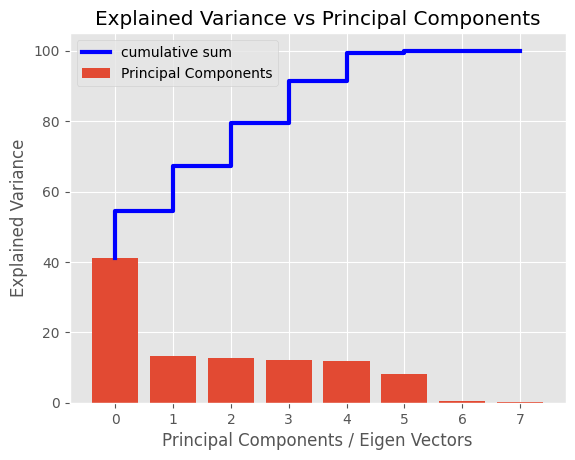

In [45]:
# Making this more visual
# Leveraging some of the stuff we learned about in the matplotlib notebook
#   05 - Beginning Matplotlib
plt.style.use('ggplot')
plt.title('Explained Variance vs Principal Components')
plt.bar(x=range(len(eigenvalue_cum_sum)), height=[ (i / np.sum(new_eigenvalues) ) * 100 \
                                                  for i in new_eigenvalues], label='Principal Components' )
plt.step(x=range(len(eigenvalue_cum_sum)), y=eigenvalue_cum_sum, c='b', \
         linestyle='-', linewidth=3, label='cumulative sum')
plt.xlabel('Principal Components / Eigen Vectors')
plt.ylabel('Explained Variance')
plt.legend(loc='best')

In [46]:
# Let's now create our projection matrix
# using the top 6 of 8 vectors
# here is what those top  vectors look like
eigen_pairs[0][1], eigen_pairs[1][1], eigen_pairs[2][1], eigen_pairs[3][1], eigen_pairs[4][1], eigen_pairs[5][1]

(array([-0.00384108,  0.05103953,  0.14525053,  0.11339098,  0.52453684,
         0.45032698,  0.52468856,  0.45846877]),
 array([ 0.00439339,  0.095694  , -0.68278284, -0.69995803,  0.07984289,
         0.04099439,  0.11373027,  0.11704572]),
 array([-0.7149068 ,  0.6831142 ,  0.09386086, -0.02348038,  0.01193903,
         0.0353772 , -0.05379278, -0.09281336]),
 array([ 0.6705112 ,  0.61910615,  0.25157004, -0.18912935,  0.0575289 ,
         0.14113182, -0.0993192 , -0.18701027]),
 array([ 0.19814749,  0.36717972, -0.5056809 ,  0.58192763, -0.14048178,
        -0.32528483,  0.14472324,  0.29167367]),
 array([-0.00505299, -0.0553955 , -0.42996113,  0.34960956,  0.26242546,
         0.55267006, -0.24711271, -0.50441686]))

In [47]:
# Get the eigen values this way if we wish also
eigen_pairs[0][0], eigen_pairs[1][0], eigen_pairs[2][0], eigen_pairs[3][0], eigen_pairs[4][0], eigen_pairs[5][0]

(3.2906641392495866,
 1.066751366051901,
 1.0215861384912872,
 0.980370868790479,
 0.9431361270931606,
 0.6547677862252037)

In [48]:
# Next up, reshape this data
# -1, 1 means, any number of rows but only 1 column
# See the following notesbooks to understand resharping
#   01 - Beginning Numpy
#   02 - Beginning Tensorflow
#   03 - Beginning PyTorch
eigen_pairs[0][1].reshape(-1, 1), eigen_pairs[1][1].reshape(-1, 1), \
eigen_pairs[2][1].reshape(-1, 1), eigen_pairs[3][1].reshape(-1, 1), \
eigen_pairs[4][1].reshape(-1, 1), eigen_pairs[5][1].reshape(-1, 1)


(array([[-0.00384108],
        [ 0.05103953],
        [ 0.14525053],
        [ 0.11339098],
        [ 0.52453684],
        [ 0.45032698],
        [ 0.52468856],
        [ 0.45846877]]),
 array([[ 0.00439339],
        [ 0.095694  ],
        [-0.68278284],
        [-0.69995803],
        [ 0.07984289],
        [ 0.04099439],
        [ 0.11373027],
        [ 0.11704572]]),
 array([[-0.7149068 ],
        [ 0.6831142 ],
        [ 0.09386086],
        [-0.02348038],
        [ 0.01193903],
        [ 0.0353772 ],
        [-0.05379278],
        [-0.09281336]]),
 array([[ 0.6705112 ],
        [ 0.61910615],
        [ 0.25157004],
        [-0.18912935],
        [ 0.0575289 ],
        [ 0.14113182],
        [-0.0993192 ],
        [-0.18701027]]),
 array([[ 0.19814749],
        [ 0.36717972],
        [-0.5056809 ],
        [ 0.58192763],
        [-0.14048178],
        [-0.32528483],
        [ 0.14472324],
        [ 0.29167367]]),
 array([[-0.00505299],
        [-0.0553955 ],
        [-0.42996113],
 

In [49]:
# With the data restored, time to stack them all together horizontally
projection_matrix = np.hstack((eigen_pairs[0][1].reshape(-1, 1), 
                               eigen_pairs[1][1].reshape(-1, 1), eigen_pairs[2][1].reshape(-1, 1), 
                               eigen_pairs[3][1].reshape(-1, 1), eigen_pairs[4][1].reshape(-1, 1), 
                               eigen_pairs[5][1].reshape(-1, 1)))
projection_matrix, projection_matrix.shape

(array([[-0.00384108,  0.00439339, -0.7149068 ,  0.6705112 ,  0.19814749,
         -0.00505299],
        [ 0.05103953,  0.095694  ,  0.6831142 ,  0.61910615,  0.36717972,
         -0.0553955 ],
        [ 0.14525053, -0.68278284,  0.09386086,  0.25157004, -0.5056809 ,
         -0.42996113],
        [ 0.11339098, -0.69995803, -0.02348038, -0.18912935,  0.58192763,
          0.34960956],
        [ 0.52453684,  0.07984289,  0.01193903,  0.0575289 , -0.14048178,
          0.26242546],
        [ 0.45032698,  0.04099439,  0.0353772 ,  0.14113182, -0.32528483,
          0.55267006],
        [ 0.52468856,  0.11373027, -0.05379278, -0.0993192 ,  0.14472324,
         -0.24711271],
        [ 0.45846877,  0.11704572, -0.09281336, -0.18701027,  0.29167367,
         -0.50441686]]),
 (8, 6))

In [50]:
# Now to test the projection, let's create a sample with 8 features
our_test_sample = np.array([2,3,4,5,6,7,8,9], dtype=float, ndmin=2)
our_test_sample

array([[2., 3., 4., 5., 6., 7., 8., 9.]])

In [51]:
# By looking at the shape of the matrix and the vector
# We see the inner dimension has 8 and the outer has 1 and 6
# Hence, we can conclude we can compute the dot product here
# and at the same time, we know our output will be 1x6
our_test_sample.shape, projection_matrix.shape

((1, 8), (8, 6))

In [52]:
# Now find the dot product of our test sample and our projection matrix
# Our sample consists of 8 items or 8 dimensions or 8 features
# However, after projection, we now have 6 dimensions or 6 items or 6 features
np.dot(our_test_sample, projection_matrix), np.dot(our_test_sample, projection_matrix).shape

(array([[15.91663073, -3.20578105, -0.06881737,  2.11442441,  3.0477132 ,
         -1.2214995 ]]),
 (1, 6))

In [54]:
# With that understanding in place, we can now project our entire scaled dataset
# from 8 to 6 dimensions and get teh shapes
df_conn_pca = df_conn_scaled.dot(projection_matrix)
df_conn_pca, df_conn_pca.shape

(array([[-0.04207179,  0.03459269, -5.67743022,  5.30281748,  1.55934372,
         -0.03749403],
        [-0.03598323,  0.02762864, -4.54421889,  4.23997839,  1.24525665,
         -0.02948445],
        [-0.03598698,  0.02763292, -4.54491597,  4.24063218,  1.24544985,
         -0.02948938],
        ...,
        [-0.01002715, -0.00037321,  0.05611218, -0.07503754, -0.02947783,
          0.0024257 ],
        [-0.01002715, -0.00037321,  0.05611218, -0.07503754, -0.02947783,
          0.0024257 ],
        [-0.01002715, -0.00037321,  0.05611218, -0.07503754, -0.02947783,
          0.0024257 ]]),
 (4430183, 6))

Text(0, 0.5, 'PC2')

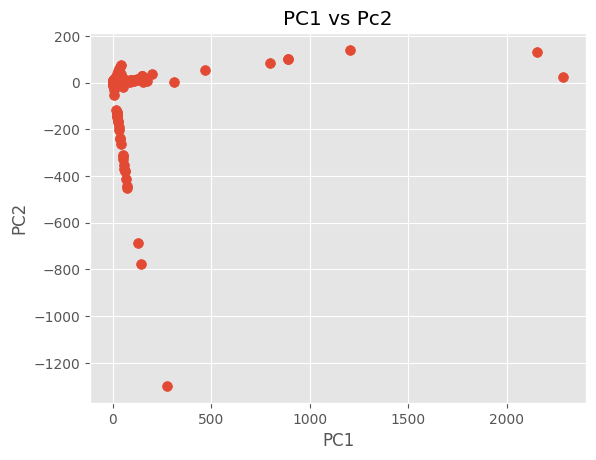

In [55]:
# Let's plot a 2d scatter plot of the first 2 Principal Components
plt.title('PC1 vs Pc2')
plt.scatter(x=df_conn_pca[:,0], y=df_conn_pca[:, 1], s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')

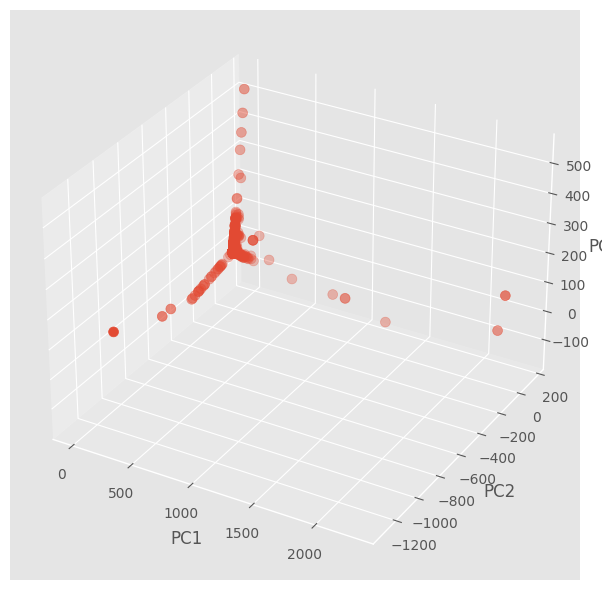

In [56]:
# Looking at the first 3 components via a 3d Plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=df_conn_pca[:,0], ys=df_conn_pca[:, 1], zs=df_conn_pca[:, 2], s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()

In [57]:
# Using sklearn PCA instead 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 
from sklearn.decomposition import PCA

In [58]:
# Rather than start off assuming how many Principal Components we need
# I am instead transforming the entire dataset
# This way, the number of PCs returned will be equaled to the number of dimensions
# Once the PCs are returned, I can then visualize the results to decide how 
#   many PCs I need based for this specific dataset
pca = PCA(n_components=None, random_state=10)

# Like we did when scaling data, we train on the test data
#   06 - Beginning Data Scaling
pca.fit(df_conn_scaled)

# Now we can transform on the scaled data as well as the test data when needed
df_conn_pca = pca.fit_transform(df_conn_scaled)

# Sample showing two of the transformed data
df_conn_pca[:2]

array([[  8.79496985,   7.07980876,   1.61583524,   8.73873236,
          0.80069904, -11.79601373,  -0.99532868,  -0.51068582],
       [-45.45254759, -20.70311415,  -1.99135324,  -9.62607653,
         -3.15936651, -33.23121154, -21.23265589, -15.65526595]])

In [61]:
# Get the principal components
pca.components_

array([[-0.03726172,  0.19587434,  0.00890328,  0.33043772,  0.61432761,
         0.0822471 ,  0.54437299,  0.41288195],
       [-0.3324217 ,  0.68805917,  0.19695357, -0.29283329, -0.00834845,
         0.52349946, -0.10200451, -0.08367825],
       [ 0.18648645, -0.0599546 ,  0.96953005,  0.04448135, -0.00206188,
        -0.1396985 ,  0.00936173,  0.00731991],
       [ 0.90048288,  0.12319981, -0.107383  , -0.2069485 ,  0.07450526,
         0.33759619,  0.00826404,  0.001758  ],
       [ 0.02820782, -0.08077564,  0.0289124 ,  0.76755357, -0.36004626,
         0.51545452, -0.07443414, -0.04287297],
       [-0.20407138, -0.67755016,  0.09365335, -0.35441764,  0.16381318,
         0.56480322,  0.11192626,  0.08082639],
       [-0.0043066 , -0.06088578,  0.00187006,  0.20917341,  0.67236724,
         0.03133192, -0.63745034, -0.30514756],
       [-0.0011891 , -0.01136084, -0.00016156,  0.04182623,  0.09181958,
         0.00437497,  0.51834963, -0.84910762]])

In [63]:
# Get the shape of the principal components matrix
# Because we had 8 features, we now have an 8x8 pca matrix
# This is just like we were able to do with our manual process
pca.components_.shape

(8, 8)

In [64]:
# Get the PCA covariance
pca.get_covariance()

array([[ 1.00000023, -0.01595392, -0.00108186, -0.00376551, -0.00323993,
        -0.00105846, -0.00303252, -0.00321629],
       [-0.01595392,  0.99976559,  0.00789002,  0.00261135,  0.04440196,
         0.03559697,  0.02496402,  0.01046547],
       [-0.00108186,  0.00789002,  0.99991369,  0.00001772,  0.00056858,
         0.00045328,  0.00044125,  0.00008907],
       [-0.00376551,  0.00261135,  0.00001772,  0.99998213,  0.0290549 ,
         0.00193403,  0.06109936,  0.07691121],
       [-0.00323993,  0.04440196,  0.00056858,  0.0290549 ,  0.99210828,
         0.00757787,  0.13594472,  0.16312377],
       [-0.00105846,  0.03559697,  0.00045328,  0.00193403,  0.00757787,
         0.98730934,  0.00982986,  0.01019212],
       [-0.00303252,  0.02496402,  0.00044125,  0.06109936,  0.13594472,
         0.00982986,  0.79207951,  0.34273273],
       [-0.00321629,  0.01046547,  0.00008907,  0.07691121,  0.16312377,
         0.01019212,  0.34273273,  0.48977465]])

In [65]:
# Get the shape of the PCA covariance
pca.get_covariance().shape

(8, 8)

In [66]:
# Get the eigen values
pca.explained_variance_

array([1.25321095, 1.03019151, 0.99915691, 0.99811288, 0.97701809,
       0.9494548 , 0.79458481, 0.25920346])

In [67]:
# Get the explained variance ratio
# This is how much each principal component represents this data
pca.explained_variance_ratio_ 

array([0.1725964 , 0.14188142, 0.13760723, 0.13746344, 0.13455819,
       0.13076209, 0.10943287, 0.03569837])

Text(0, 0.5, 'Explained variance ratio')

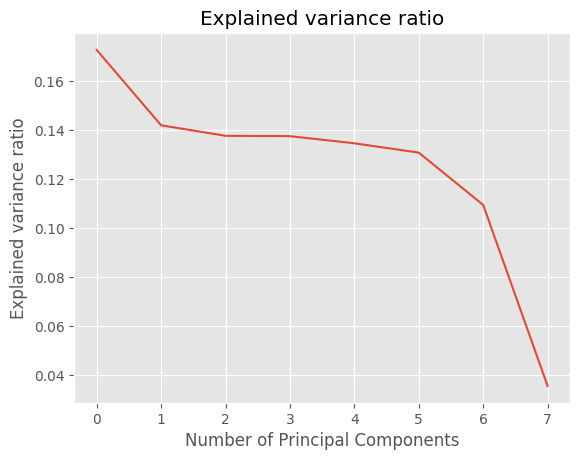

In [68]:
# Plotting the explained variance ratio
plt.title('Explained variance ratio')
plt.plot(pca.explained_variance_ratio_)
plt.xlabel(xlabel='Number of Principal Components')
plt.ylabel(ylabel='Explained variance ratio')

Text(0, 0.5, 'Explained variance ratio')

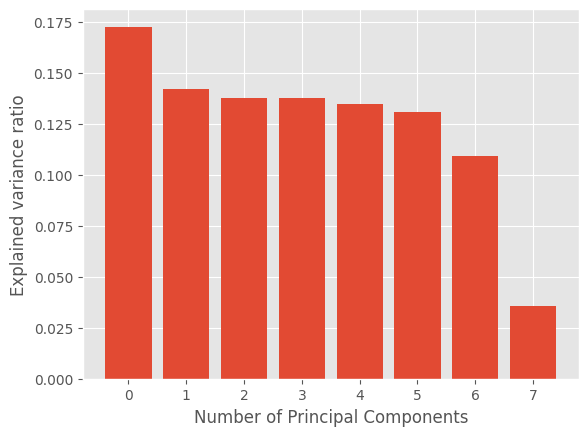

In [69]:
# A bar char may be more meaningful
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel(xlabel='Number of Principal Components')
plt.ylabel(ylabel='Explained variance ratio')

Text(0, 0.5, 'Explained variance ratio')

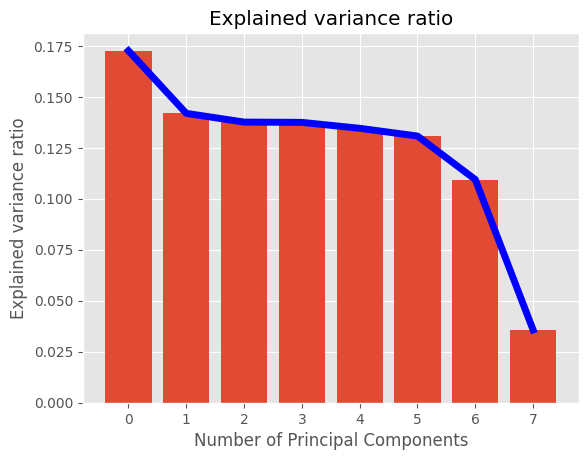

In [70]:
# Or maybe we wish to leverage some of the tricks learned in the Matplotlib notebook
#   05 - Beginning Matplotlib
# and have both graphs in one
plt.title('Explained variance ratio')
plt.plot(pca.explained_variance_ratio_, ls='-', c='b', lw=5)
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel(xlabel='Number of Principal Components')
plt.ylabel(ylabel='Explained variance ratio')

In [72]:
# Get the cumulative sum of the explained_variance_rato
# When we look at the output of this command, we see 5 PCs get us to 72%
# It take 6 PCs to get 85%
# and 7 PCs to get to 96%
np.cumsum(pca.explained_variance_ratio_ )

array([0.1725964 , 0.31447781, 0.45208504, 0.58954848, 0.72410667,
       0.85486876, 0.96430163, 1.        ])

In [73]:
# Considering above, we are more knowledgeable about the specific
# number of principal components, we can use for this particular dataset
# Let's tell the algorithm, to use 6 principal components as we would like to get about 85% of the meaning of the data
pca = PCA(n_components=6, random_state=10)

# In this case, I'm fitting and transforming at the same time
df_conn_pca = pca.fit_transform(df_conn_scaled)

# Sample showing two of the transformed data
df_conn_pca[:2]

array([[-471.53478918, -106.90765016,  418.95331567,  128.44102861,
           3.00648232,  -60.3578586 ],
       [-175.82214105,  129.89416244, -123.12210194,   65.06650829,
         -53.89756649,   18.66583178]])

In [74]:
# Get the shape fo the new PCA'd dataset
df_conn_pca.shape

(4430183, 6)

In [76]:
# Now just as we were able to tell the model the number of principal components we need,
# We can also tell it the amount of meaning of the data we would like to retain
pca = PCA(n_components=.85, random_state=10)
df_conn_pca = pca.fit_transform(df_conn_scaled)


In [77]:
# When we validate the above command, we see it reports 6 Principal Components
pca.n_components_

6

In [78]:
# Changing the number of .70 to get 70% of the meaning of the data
# gives us 5 PCs.
pca = PCA(n_components=.70, random_state=10)
df_conn_pca = pca.fit_transform(df_conn_scaled)
pca.n_components_

5

Reference and other good reads: <br>
    https://datascienceplus.com/understanding-the-covariance-matrix/ <br>
    https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html <br>
    https://programmathically.com/singular-value-decomposition/ <br>
    https://medium.com/analytics-vidhya/principal-component-analysis-pca-112157c2d691 <br>
    https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8 <br>
    https://sebastianraschka.com/Articles/2014_python_lda.html <br>
    https://builtin.com/data-science/step-step-explanation-principal-component-analysis <br>

### So what have we done so far. <br>
We learned about Numpy <br>
    01.  Beginning Numpy <br>

We learned about Tensorflow <br>
    02.  Beginning Tensorflow <br>

We learned about PyTorch <br>
    03.  Beginning PyTorch <br>

We learned about our data via Pandas <br>
    04.  Beginning Pandas <br>

We visualized our data while learning about Matplotlib <br>
    05.  Beginning Matplotlib <br>

We learned about scaling while tranforming our data <br>
    06.  Beginning Data Scaling <br>

We then reduced the dimensionality of the data, using unsupervised linear dimensionality reduction  <br>
via PCA in this notebook. <br>
    07 - Beginning Principal Component Analysis (PCA) <br>


Time to build a few models